In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
plt.rcParams['axes.grid'] = True

In [3]:
new_trans = np.genfromtxt('hor1dir2/HORI_final_1712.dat',names=True)
mat_aper = np.genfromtxt('elena_cats/HOROLOGIUM_CF.2.APER.CAT',names=True)
mat_psf = np.genfromtxt('elena_cats/HOROLOGIUM_CF.1.PSF.CAT',names=True)
old_trans = np.genfromtxt('magsWerrs0811/HORI_final_0612.dat',names=True)

In [105]:
def range_f(array):
    
    array = array[array < 3]
    
#     maxf = np.nanmax(array)
#     minf = np.nanmin(array)

    maxf = np.percentile(array,68)
    minf = np.percentile(array,34)
    
    return maxf-minf

In [147]:
def range_f2(array):
    
    array = array[array < 3]
    
#     maxf = np.nanmax(array)
#     minf = np.nanmin(array)
    
    return np.median(array)

In [6]:
nt606 = new_trans['median_f606w']
nt814 = new_trans['median_f814w']

ot606 = old_trans['median_f606w']
ot814 = old_trans['median_f814w']

ma606 = mat_aper['m606c']
ma814 = mat_aper['m814c']

mp606 = mat_psf['m606c']
mp814 = mat_psf['m814c']

In [130]:
ne606 = new_trans['stdev_f606w']
ne814 = new_trans['stdev_f814w']

oe606 = old_trans['stdev_f606w']
oe814 = old_trans['stdev_f814w']

In [42]:
ntcol = nt606 - nt814
otcol = ot606 - ot814

macol = ma606 - ma814
mpcol = mp606 - mp814

In [29]:
print(len(new_trans[new_trans['median_f606w']<28]))
print(len(old_trans[old_trans['median_f606w']<28]))

print(len(mat_aper[mat_aper['m606c']<28]))
print(len(mat_psf[mat_psf['m606c']<28]))

1196
765
3144
3427


In [152]:
upper_lim = new_trans[new_trans['median_f606w']<25]
msto = upper_lim[upper_lim['median_f606w']>22]
print(len(msto))

355


In [153]:
upper_lim = old_trans[old_trans['median_f606w']<25]
msto = upper_lim[upper_lim['median_f606w']>22]
print(len(msto))

312


In [154]:
upper_lim = mat_aper[mat_aper['m606c']<25]
msto = upper_lim[upper_lim['m606c']>22]
print(len(msto))

331


In [155]:
upper_lim = mat_psf[mat_psf['m606c']<25]
msto = upper_lim[upper_lim['m606c']>22]
print(len(msto))

347


In [156]:
upper_lim = new_trans[new_trans['median_f606w']<=26]
msto = upper_lim[upper_lim['median_f606w']>=21]
print(len(msto))

upper_lim = old_trans[old_trans['median_f606w']<=26]
msto = upper_lim[upper_lim['median_f606w']>=21]
print(len(msto))

upper_lim = mat_aper[mat_aper['m606c']<=26]
msto = upper_lim[upper_lim['m606c']>=21]
print(len(msto))

upper_lim = mat_psf[mat_psf['m606c']<=26]
msto = upper_lim[upper_lim['m606c']>=21]
print(len(msto))

787
597
839
905


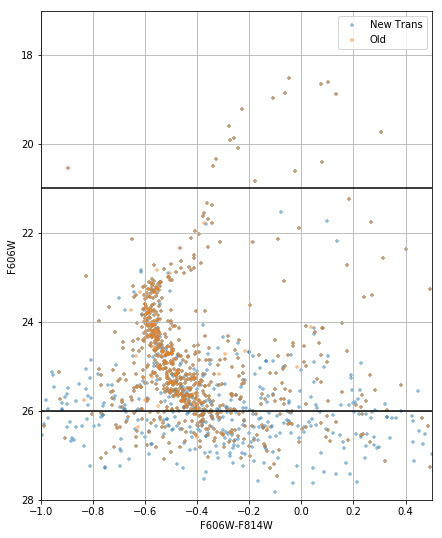

In [157]:
fig,ax = plt.subplots(figsize=(7,9))

ax.scatter(nt606-nt814,nt606,label='New Trans',alpha=0.5,s=12,marker='+')
ax.scatter(ot606-ot814,ot606,label='Old',alpha=0.5,s=12,marker='+')

ax.set_ylabel('F606W')
ax.set_xlabel('F606W-F814W')
ax.hlines(21,-1,0.5)
ax.hlines(26,-1,0.5)
ax.set_xlim(-1,0.5)
ax.set_ylim(28,17)
ax.legend()

plt.show()

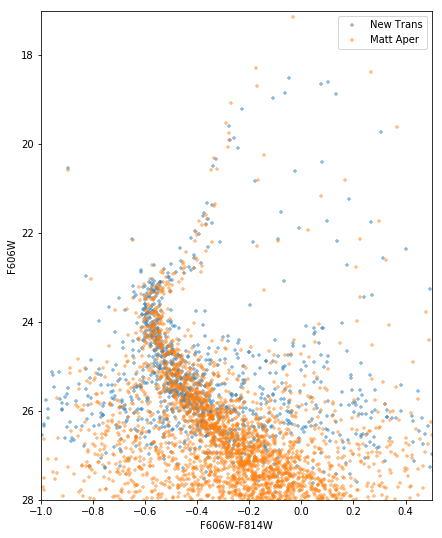

In [15]:
fig,ax = plt.subplots(figsize=(7,9))

ax.scatter(nt606-nt814,nt606,label='New Trans',alpha=0.5,s=12,marker='+')
ax.scatter(ma606-ma814,ma606,label='Matt Aper',alpha=0.5,s=12,marker='+')

ax.set_ylabel('F606W')
ax.set_xlabel('F606W-F814W')
ax.set_xlim(-1,0.5)
ax.set_ylim(28,17)
ax.legend()

plt.show()

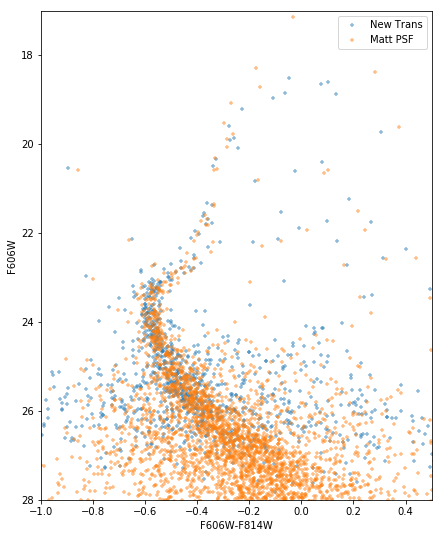

In [16]:
fig,ax = plt.subplots(figsize=(7,9))

ax.scatter(nt606-nt814,nt606,label='New Trans',alpha=0.5,s=12,marker='+')
ax.scatter(mp606-mp814,mp606,label='Matt PSF',alpha=0.5,s=12,marker='+')

ax.set_ylabel('F606W')
ax.set_xlabel('F606W-F814W')
ax.set_xlim(-1,0.5)
ax.set_ylim(28,17)
ax.legend()

plt.show()

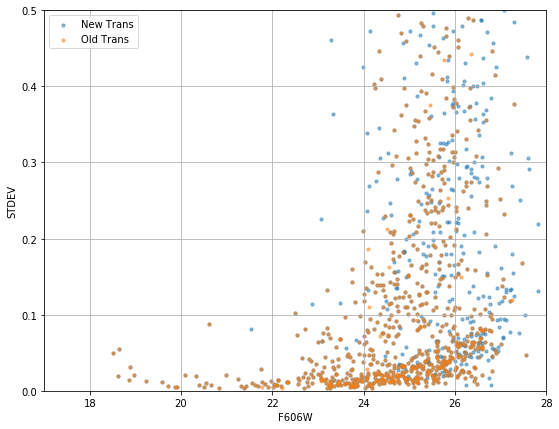

In [56]:
fig,ax = plt.subplots(figsize=(9,7))

ax.scatter(nt606,new_trans['stdev_f606w'],label='New Trans',alpha=0.5,s=10)
ax.scatter(ot606,old_trans['stdev_f606w'],label='Old Trans',alpha=0.5,s=10)


ax.set_ylabel('STDEV')
ax.set_xlabel('F606W')


ax.set_ylim(0,0.5)
ax.set_xlim(17,28)
ax.legend()

plt.show()

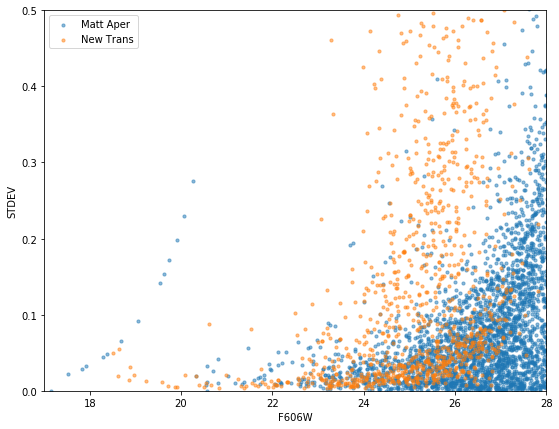

In [23]:
fig,ax = plt.subplots(figsize=(9,7))

# ax.scatter(nt606-nt814,nt606,label='New Trans',alpha=0.5,s=12,marker='+')
# ax.scatter(mp606-mp814,mp606,label='Matt PSF',alpha=0.5,s=12,marker='+')


ax.scatter(ma606,mat_aper['s606'],label='Matt Aper',alpha=0.5,s=10)
ax.scatter(nt606,new_trans['stdev_f606w'],label='New Trans',alpha=0.5,s=10)

ax.set_ylabel('STDEV')
ax.set_xlabel('F606W')


ax.set_ylim(0,0.5)
ax.set_xlim(17,28)
ax.legend()

plt.show()

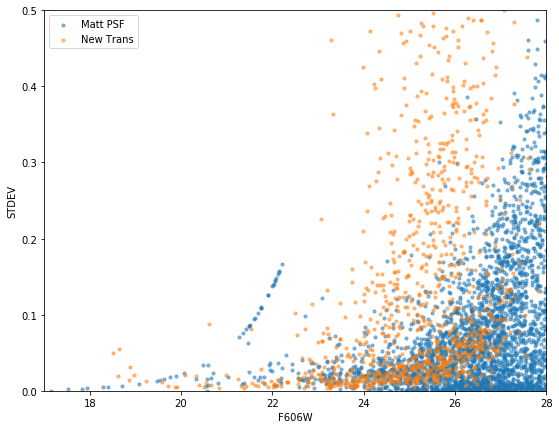

In [24]:
fig,ax = plt.subplots(figsize=(9,7))

# ax.scatter(nt606-nt814,nt606,label='New Trans',alpha=0.5,s=12,marker='+')
# ax.scatter(mp606-mp814,mp606,label='Matt PSF',alpha=0.5,s=12,marker='+')


ax.scatter(mp606,mat_psf['s606'],label='Matt PSF',alpha=0.5,s=10)
ax.scatter(nt606,new_trans['stdev_f606w'],label='New Trans',alpha=0.5,s=10)

ax.set_ylabel('STDEV')
ax.set_xlabel('F606W')


ax.set_ylim(0,0.5)
ax.set_xlim(17,28)
ax.legend()

plt.show()

# Binning Things

In [32]:
bins = np.arange(20, 28, 0.5)
digitized = np.digitize(nt606, bins)
bin_means_han = [nt606[digitized == i].mean() for i in range(1, len(bins))]

In [49]:
digitized8 = np.digitize(nt814, bins)
bin_ihan = [nt814[digitized8 == i].mean() for i in range(1, len(bins))]

digitized9 = np.digitize(ma814, bins)
bin_imat = [ma814[digitized9 == i].mean() for i in range(1, len(bins))]

digitized10 = np.digitize(mp814, bins)
bin_ipsf = [mp814[digitized10 == i].mean() for i in range(1, len(bins))]

In [33]:
digitized1 = np.digitize(ma606, bins)
bin_means_mat = [ma606[digitized1 == i].mean() for i in range(1, len(bins))]

digitized2 = np.digitize(mp606, bins)
bin_means_psf = [mp606[digitized2 == i].mean() for i in range(1, len(bins))]

In [37]:
digitized3 = np.digitize(ot606, bins)
bin_means_old = [ot606[digitized3 == i].mean() for i in range(1, len(bins))]

In [117]:
digitized11 = np.digitize(ot814, bins)
bin_ihan_old = [ot814[digitized11 == i].mean() for i in range(1, len(bins))]

In [43]:
bins2 = np.arange(-1, 2, 0.25)
digitized4 = np.digitize(ntcol, bins2)
nc_bins = [ntcol[digitized4 == i].mean() for i in range(1, len(bins2))]

digitized5 = np.digitize(otcol, bins2)
oc_bins = [otcol[digitized5 == i].mean() for i in range(1, len(bins2))]

digitized6 = np.digitize(macol, bins2)
ma_bins = [macol[digitized6 == i].mean() for i in range(1, len(bins2))]

digitized7 = np.digitize(mpcol, bins2)
mp_bins = [mpcol[digitized7 == i].mean() for i in range(1, len(bins2))]

In [106]:
range_col = [[] for ll in range(len(bins))]
for ii in range(1,len(bins)):
    range_col[ii] = range_f(ntcol[digitized==ii])

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
range_col_ol = [[] for ll in range(len(bins))]
for ii in range(1,len(bins)):
    range_col_ol[ii] = range_f(otcol[digitized3==ii])

In [107]:
range_col_ma = [[] for ll in range(len(bins))]
for ii in range(1,len(bins)):
    range_col_ma[ii] = range_f(macol[digitized1==ii])

In [108]:
range_col_psf = [[] for ll in range(len(bins))]
for ii in range(1,len(bins)):
    range_col_psf[ii] = range_f(mpcol[digitized2==ii])

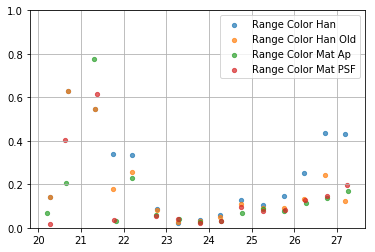

In [124]:
fig, ax = plt.subplots()

ax.scatter(bin_means_han,range_col[1:],label='Range Color Han',s=18,alpha=0.7)
ax.scatter(bin_means_han,range_col_ol[1:],label='Range Color Han Old',s=18,alpha=0.7)
ax.scatter(bin_means_mat,range_col_ma[1:],label='Range Color Mat Ap',s=18,alpha=0.7)
ax.scatter(bin_means_psf,range_col_psf[1:],label='Range Color Mat PSF',s=18,alpha=0.7)

ax.legend()
ax.set_ylim(0,1)
plt.show()

In [148]:
range_cole = [[] for ll in range(len(bins))]
for ii in range(1,len(bins)):
    range_cole[ii] = range_f2(ne606[digitized==ii])
    
range_col_ole = [[] for ll in range(len(bins))]
for ii in range(1,len(bins)):
    range_col_ole[ii] = range_f2(oe606[digitized3==ii])

In [ ]:
plt.hist(,bins=mag_bin,density=True,label='Matt PSF NM')

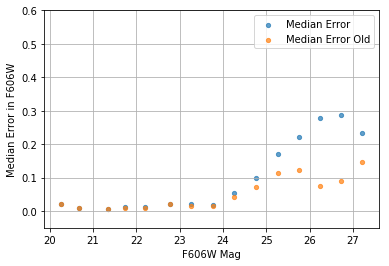

In [150]:
fig, ax = plt.subplots()

ax.scatter(bin_means_han,range_cole[1:],label='Median Error',s=18,alpha=0.7)
ax.scatter(bin_means_han,range_col_ole[1:],label='Median Error Old',s=18,alpha=0.7)

ax.set_xlabel('F606W Mag')
ax.set_ylabel('Median Error in F606W')
ax.legend()
ax.set_ylim(-0.05,0.6)
plt.show()

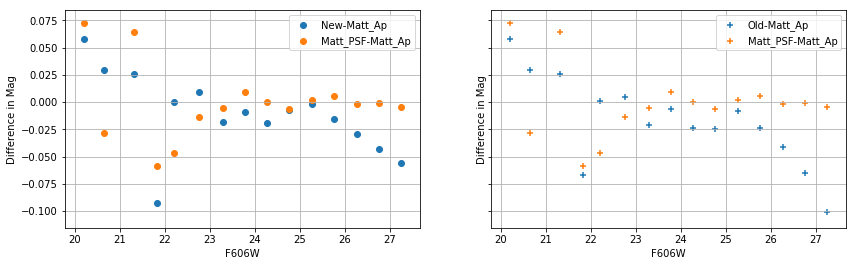

In [110]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4),sharey=True)

ax1.scatter(bin_means_mat,np.array(bin_means_han)-np.array(bin_means_mat),\
          label='New-Matt_Ap')
ax1.scatter(bin_means_mat,np.array(bin_means_psf)-np.array(bin_means_mat),\
          label='Matt_PSF-Matt_Ap')

ax1.set_xlabel('F606W')
ax1.set_ylabel('Difference in Mag')
ax1.legend()

ax2.scatter(bin_means_mat,np.array(bin_means_old)-np.array(bin_means_mat),\
          label='Old-Matt_Ap',marker='+')
ax2.scatter(bin_means_mat,np.array(bin_means_psf)-np.array(bin_means_mat),\
          label='Matt_PSF-Matt_Ap',marker='+')


ax2.set_xlabel('F606W')
ax2.set_ylabel('Difference in Mag')
ax2.legend()

plt.grid(True)
plt.show()

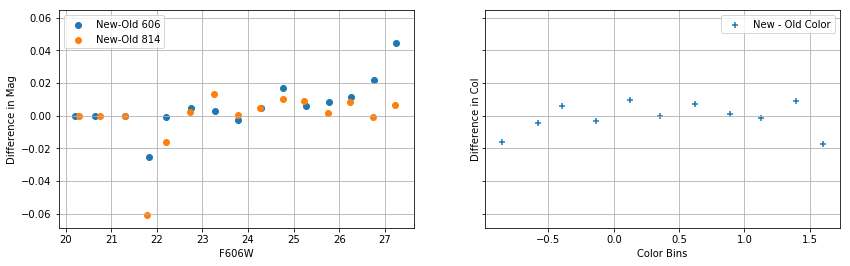

In [119]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4),sharey=True)

ax1.scatter(bin_means_mat,np.array(bin_means_han)-np.array(bin_means_old),\
          label='New-Old 606')
ax1.scatter(bin_ihan,np.array(bin_ihan)-np.array(bin_ihan_old),\
          label='New-Old 814')
# ax1.scatter(bin_means_mat,np.array(bin_means_psf)-np.array(bin_means_old),\
#           label='Matt_PSF-Matt_Ap')

ax1.set_xlabel('F606W')
ax1.set_ylabel('Difference in Mag')
ax1.legend()

# ax2.scatter(bin_means_mat,np.array(bin_means_old)-np.array(bin_means_mat),\
#           label='Old-Matt_Ap',marker='+')
ax2.scatter(nc_bins,np.array(nc_bins)-np.array(oc_bins),\
          label='New - Old Color',marker='+')


ax2.set_xlabel('Color Bins')
ax2.set_ylabel('Difference in Col')
ax2.legend()

plt.grid(True)
plt.show()

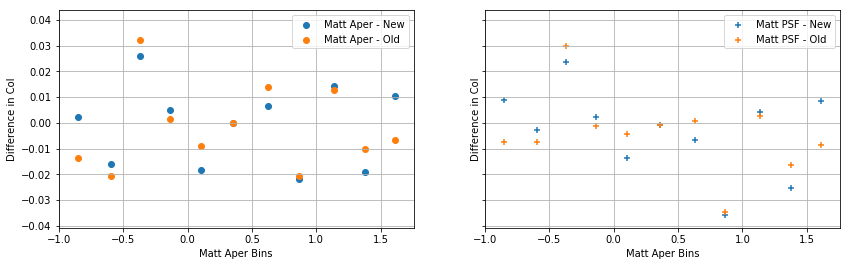

In [125]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4),sharey=True)

ax1.scatter(ma_bins,np.array(ma_bins)-np.array(nc_bins),\
          label='Matt Aper - New')
ax1.scatter(ma_bins,np.array(ma_bins)-np.array(oc_bins),\
          label='Matt Aper - Old')
# ax1.scatter(bin_means_mat,np.array(bin_means_psf)-np.array(bin_means_old),\
#           label='Matt_PSF-Matt_Ap')

ax1.set_xlabel('Matt Aper Bins')
ax1.set_ylabel('Difference in Col')
ax1.legend()

# ax2.scatter(bin_means_mat,np.array(bin_means_old)-np.array(bin_means_mat),\
#           label='Old-Matt_Ap',marker='+')
ax2.scatter(ma_bins,np.array(mp_bins)-np.array(nc_bins),\
          label='Matt PSF - New',marker='+')
ax2.scatter(ma_bins,np.array(mp_bins)-np.array(oc_bins),\
          label='Matt PSF - Old',marker='+')

ax2.set_xlabel('Matt Aper Bins')
ax2.set_ylabel('Difference in Col')
ax2.legend()

plt.grid(True)
plt.show()

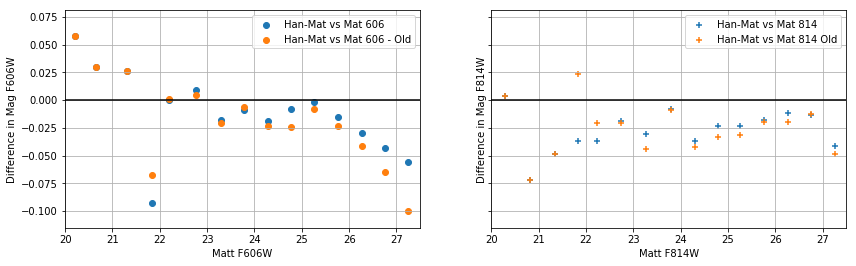

In [129]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4),sharey=True)

ax1.scatter(bin_means_mat,np.array(bin_means_han)-np.array(bin_means_mat),\
          label='Han-Mat vs Mat 606')
ax1.scatter(bin_means_mat,np.array(bin_means_old)-np.array(bin_means_mat),\
          label='Han-Mat vs Mat 606 - Old')
# ax1.scatter(bin_means_mat,np.array(bin_means_psf)-np.array(bin_means_old),\
#           label='Matt_PSF-Matt_Ap')

ax1.set_xlabel('Matt F606W')
ax1.set_ylabel('Difference in Mag F606W')
ax1.legend()

ax2.scatter(bin_imat,np.array(bin_ihan)-np.array(bin_imat),\
          label='Han-Mat vs Mat 814',marker='+')
ax2.scatter(bin_imat,np.array(bin_ihan_old)-np.array(bin_imat),\
          label='Han-Mat vs Mat 814 Old',marker='+')
# ax2.scatter(nc_bins,np.array(nc_bins)-np.array(oc_bins),\
#           label='New - Old Color',marker='+')


ax2.set_xlabel('Matt F814W')
ax2.set_ylabel('Difference in Mag F814W')
ax2.legend()

ax1.hlines(0,19,28)
ax1.set_xlim(20,27.5)

ax2.hlines(0,19,28)
ax2.set_xlim(20,27.5)

# plt.grid(True)
plt.show()

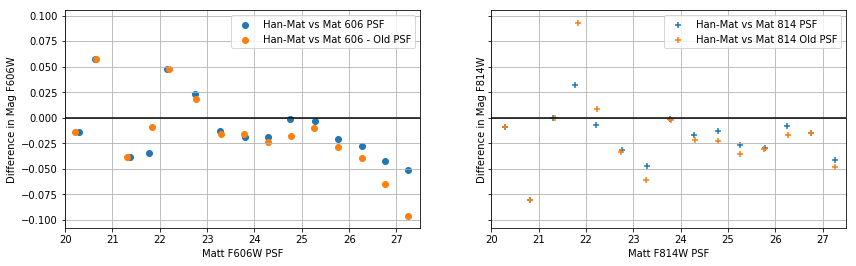

In [146]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4),sharey=True)

ax1.scatter(bin_means_psf,np.array(bin_means_han)-np.array(bin_means_psf),\
          label='Han-Mat vs Mat 606 PSF')
ax1.scatter(bin_means_mat,np.array(bin_means_old)-np.array(bin_means_psf),\
          label='Han-Mat vs Mat 606 - Old PSF')
# ax1.scatter(bin_means_mat,np.array(bin_means_psf)-np.array(bin_means_old),\
#           label='Matt_PSF-Matt_Ap')

ax1.set_xlabel('Matt F606W PSF')
ax1.set_ylabel('Difference in Mag F606W')
ax1.legend()

ax2.scatter(bin_ipsf,np.array(bin_ihan)-np.array(bin_ipsf),\
          label='Han-Mat vs Mat 814 PSF',marker='+')

ax2.scatter(bin_imat,np.array(bin_ihan_old)-np.array(bin_ipsf),\
          label='Han-Mat vs Mat 814 Old PSF',marker='+')
# ax2.scatter(nc_bins,np.array(nc_bins)-np.array(oc_bins),\
#           label='New - Old Color',marker='+')


ax2.set_xlabel('Matt F814W PSF')
ax2.set_ylabel('Difference in Mag F814W')
ax2.legend()

ax1.hlines(0,19,28)
ax1.set_xlim(20,27.5)

ax2.hlines(0,19,28)
ax2.set_xlim(20,27.5)
# plt.grid(True)
plt.show()

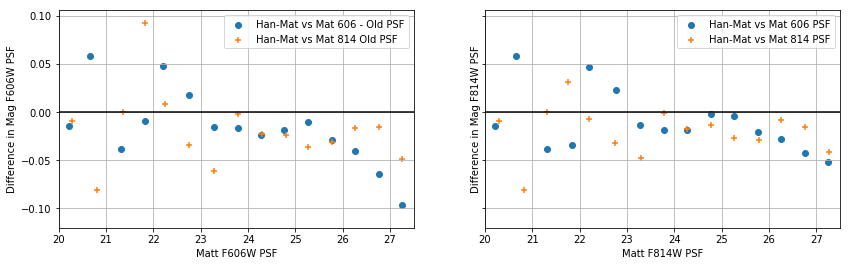

In [144]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4),sharey=True)

# ax1.scatter(bin_means_psf,np.array(bin_means_han)-np.array(bin_means_psf),\
#           label='Han-Mat vs Mat PSF')
ax1.scatter(bin_means_mat,np.array(bin_means_old)-np.array(bin_means_psf),\
          label='Han-Mat vs Mat 606 - Old PSF')
# ax1.scatter(bin_means_mat,np.array(bin_means_psf)-np.array(bin_means_old),\
#           label='Matt_PSF-Matt_Ap')
ax1.scatter(bin_imat,np.array(bin_ihan_old)-np.array(bin_ipsf),\
          label='Han-Mat vs Mat 814 Old PSF',marker='+')


ax1.set_xlabel('Matt F606W PSF')
ax1.set_ylabel('Difference in Mag F606W PSF')
ax1.legend()

ax2.scatter(bin_means_mat,np.array(bin_means_han)-np.array(bin_means_psf),\
          label='Han-Mat vs Mat 606 PSF')

# ax2.scatter(bin_imat,np.array(bin_ihan_old)-np.array(bin_ipsf),\
#           label='Han-Mat vs Mat 814 Old',marker='+')
# ax2.scatter(nc_bins,np.array(nc_bins)-np.array(oc_bins),\
#           label='New - Old Color',marker='+')
ax2.scatter(bin_ipsf,np.array(bin_ihan)-np.array(bin_ipsf),\
          label='Han-Mat vs Mat 814 PSF',marker='+')


ax2.set_xlabel('Matt F814W PSF')
ax2.set_ylabel('Difference in Mag F814W PSF')
ax2.legend()

ax1.hlines(0,19,28)
ax1.set_xlim(20,27.5)

ax2.hlines(0,19,28)
ax2.set_xlim(20,27.5)
# plt.grid(True)
plt.show()

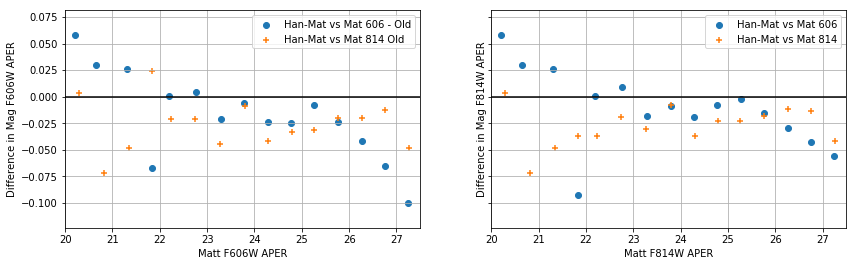

In [145]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4),sharey=True)

# ax1.scatter(bin_means_psf,np.array(bin_means_han)-np.array(bin_means_psf),\
#           label='Han-Mat vs Mat PSF')
ax1.scatter(bin_means_mat,np.array(bin_means_old)-np.array(bin_means_mat),\
          label='Han-Mat vs Mat 606 - Old')
# ax1.scatter(bin_means_mat,np.array(bin_means_psf)-np.array(bin_means_old),\
#           label='Matt_PSF-Matt_Ap')
ax1.scatter(bin_imat,np.array(bin_ihan_old)-np.array(bin_imat),\
          label='Han-Mat vs Mat 814 Old',marker='+')


ax1.set_xlabel('Matt F606W APER')
ax1.set_ylabel('Difference in Mag F606W APER')
ax1.legend()

ax2.scatter(bin_means_mat,np.array(bin_means_han)-np.array(bin_means_mat),\
          label='Han-Mat vs Mat 606')

# ax2.scatter(bin_imat,np.array(bin_ihan_old)-np.array(bin_ipsf),\
#           label='Han-Mat vs Mat 814 Old',marker='+')
# ax2.scatter(nc_bins,np.array(nc_bins)-np.array(oc_bins),\
#           label='New - Old Color',marker='+')
ax2.scatter(bin_imat,np.array(bin_ihan)-np.array(bin_imat),\
          label='Han-Mat vs Mat 814',marker='+')


ax2.set_xlabel('Matt F814W APER')
ax2.set_ylabel('Difference in Mag F814W APER')
ax2.legend()

ax1.hlines(0,19,28)
ax1.set_xlim(20,27.5)

ax2.hlines(0,19,28)
ax2.set_xlim(20,27.5)
# plt.grid(True)
plt.show()